In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Data.csv', index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [3]:
# statistical analysis

df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


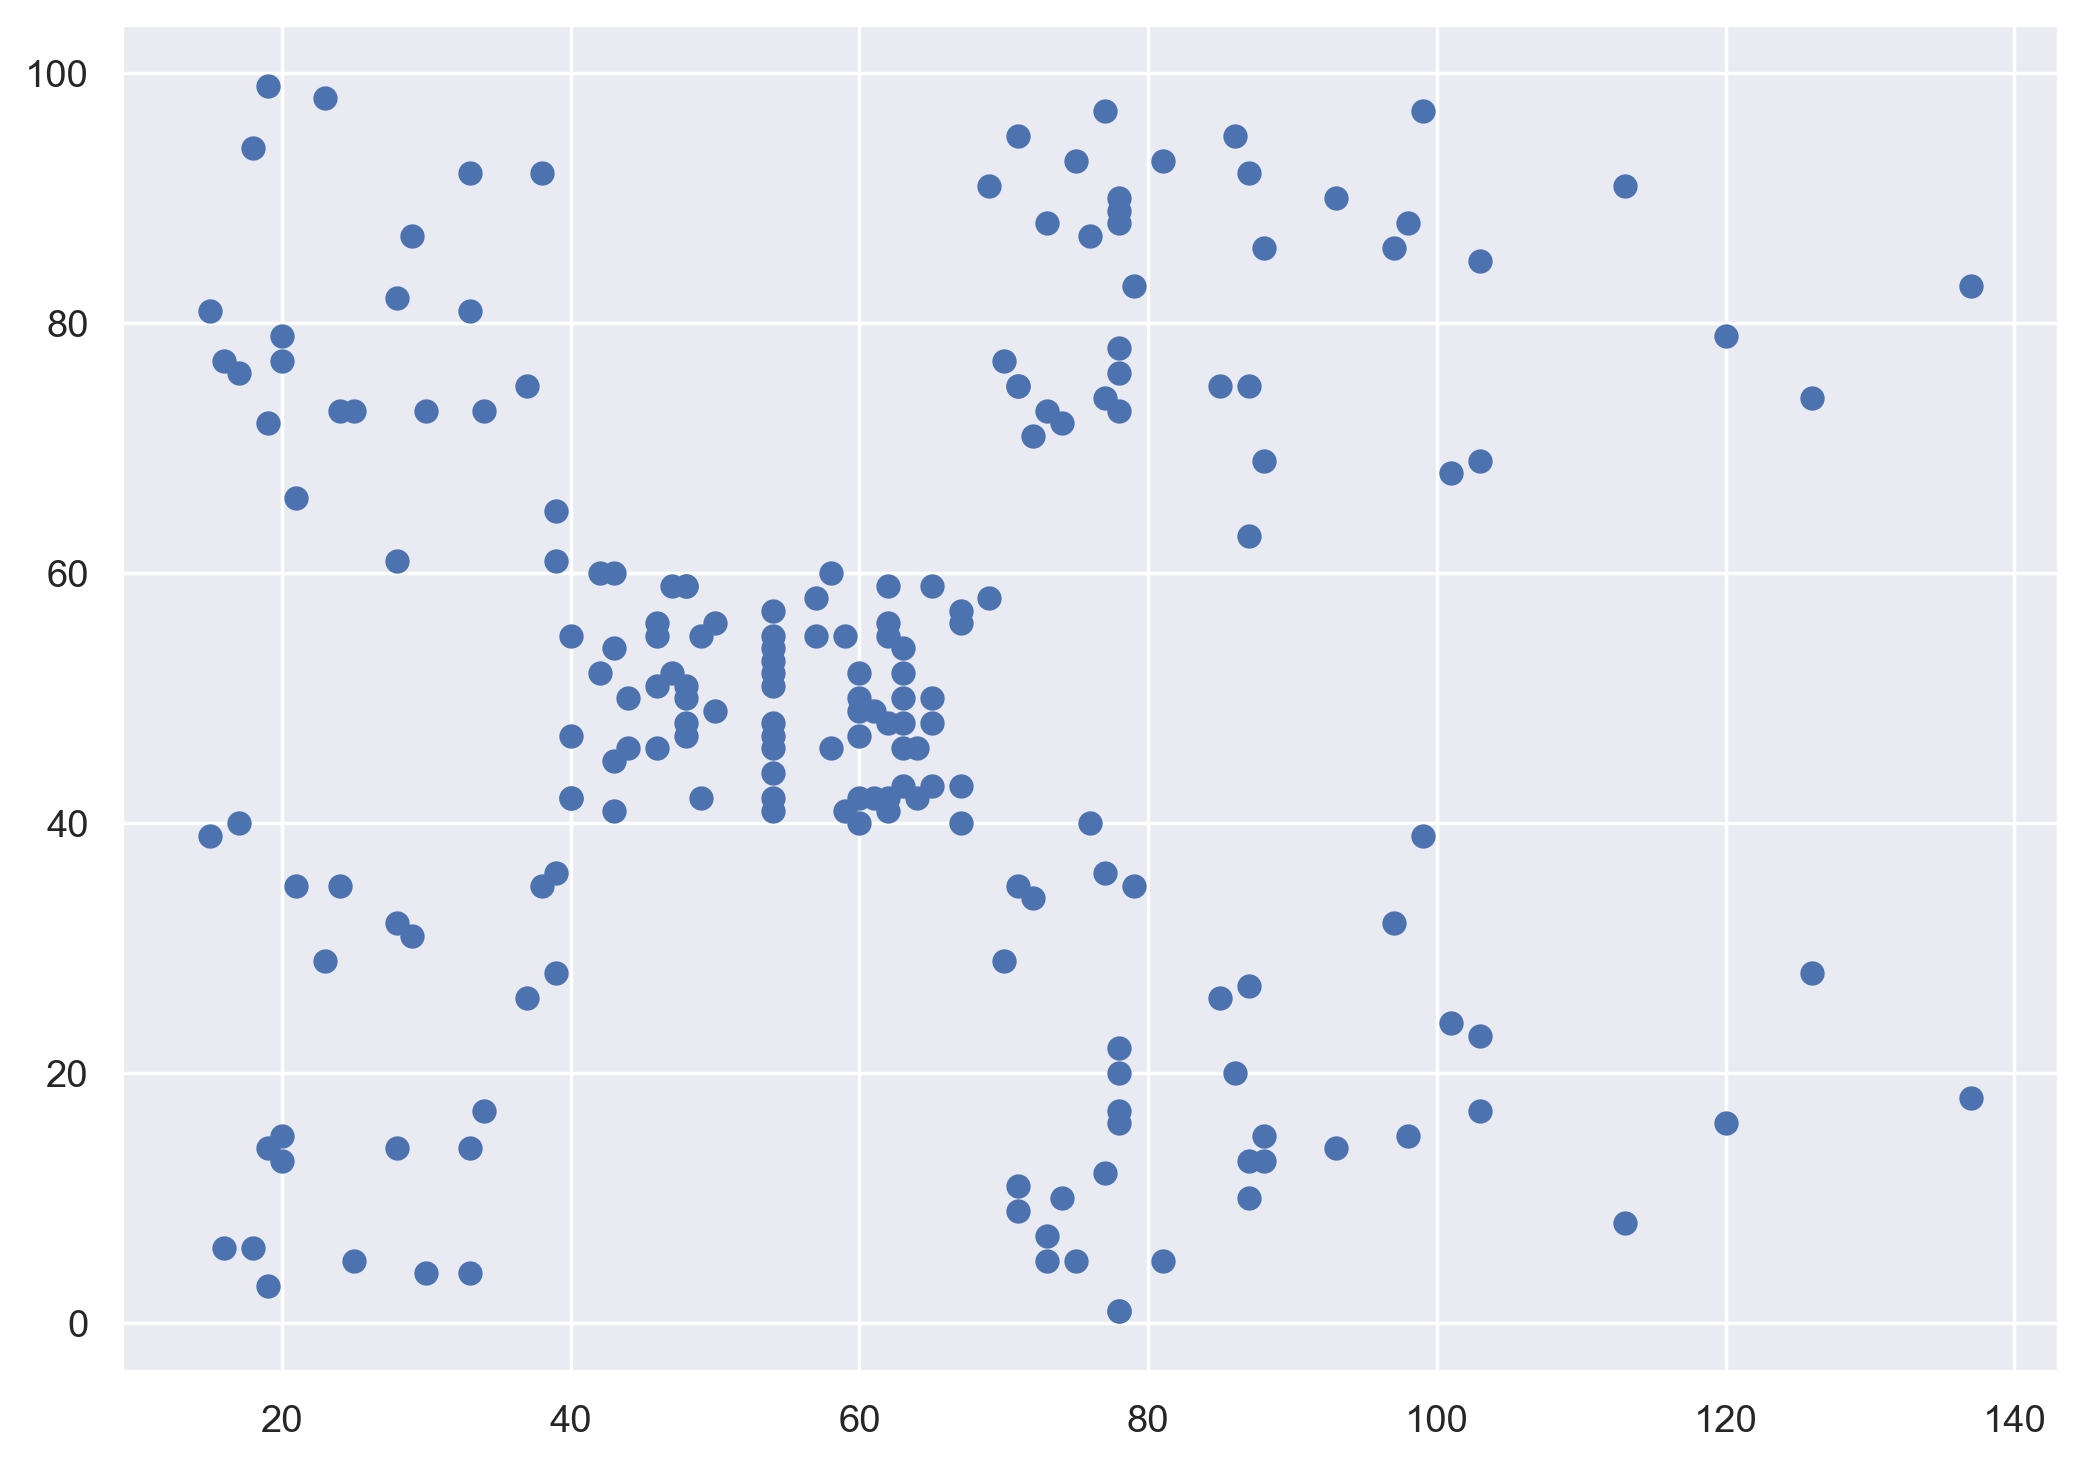

In [4]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],cmap='virdis')

In [5]:
# outliers are present in the annual column let's confirm with boxplot

<Axes: >

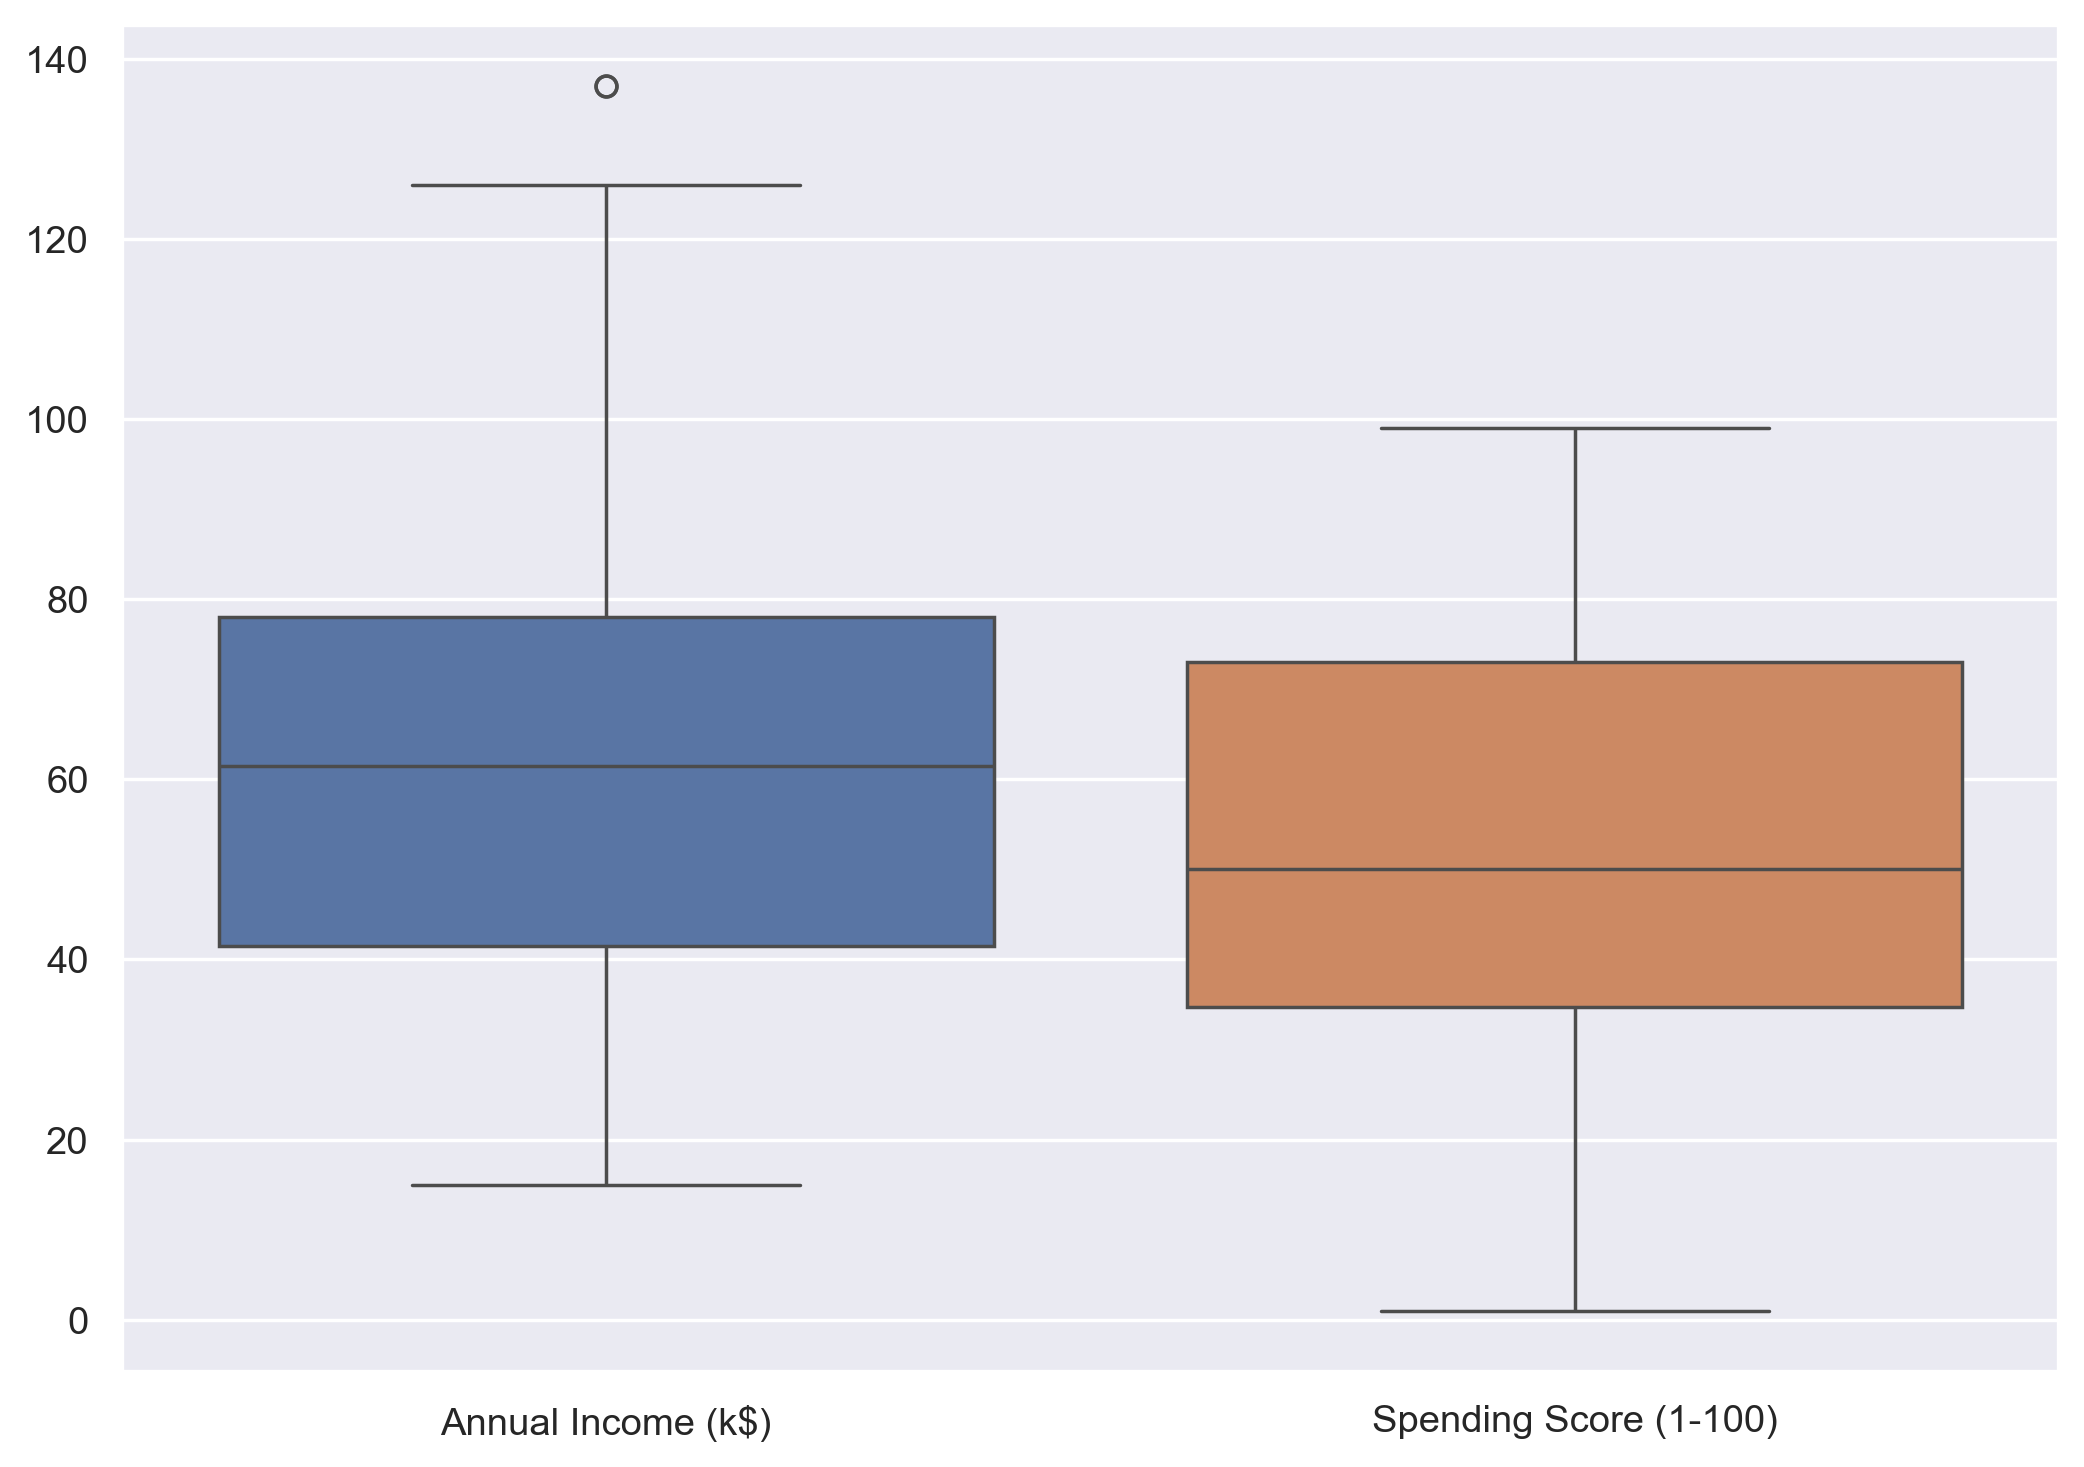

In [6]:
sns.boxplot(df)

In [7]:
df.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

4

In [9]:
# there are 4 duplicated records

In [10]:
df.shape

(200, 2)

In [11]:
# remove duplicated rows

df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

# remove outliers

In [14]:
# capping method
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = q3 - q1
upper = q3 + (1.5 * IQR)
df[df['Annual Income (k$)'] > upper]

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
199,137,18
200,137,83


In [15]:
# capping outliers

df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > upper, upper, df['Annual Income (k$)'])
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15.00,39
2,15.00,81
3,16.00,6
4,16.00,77
5,17.00,40
...,...,...
196,120.00,79
197,126.00,28
198,126.00,74


<Axes: >

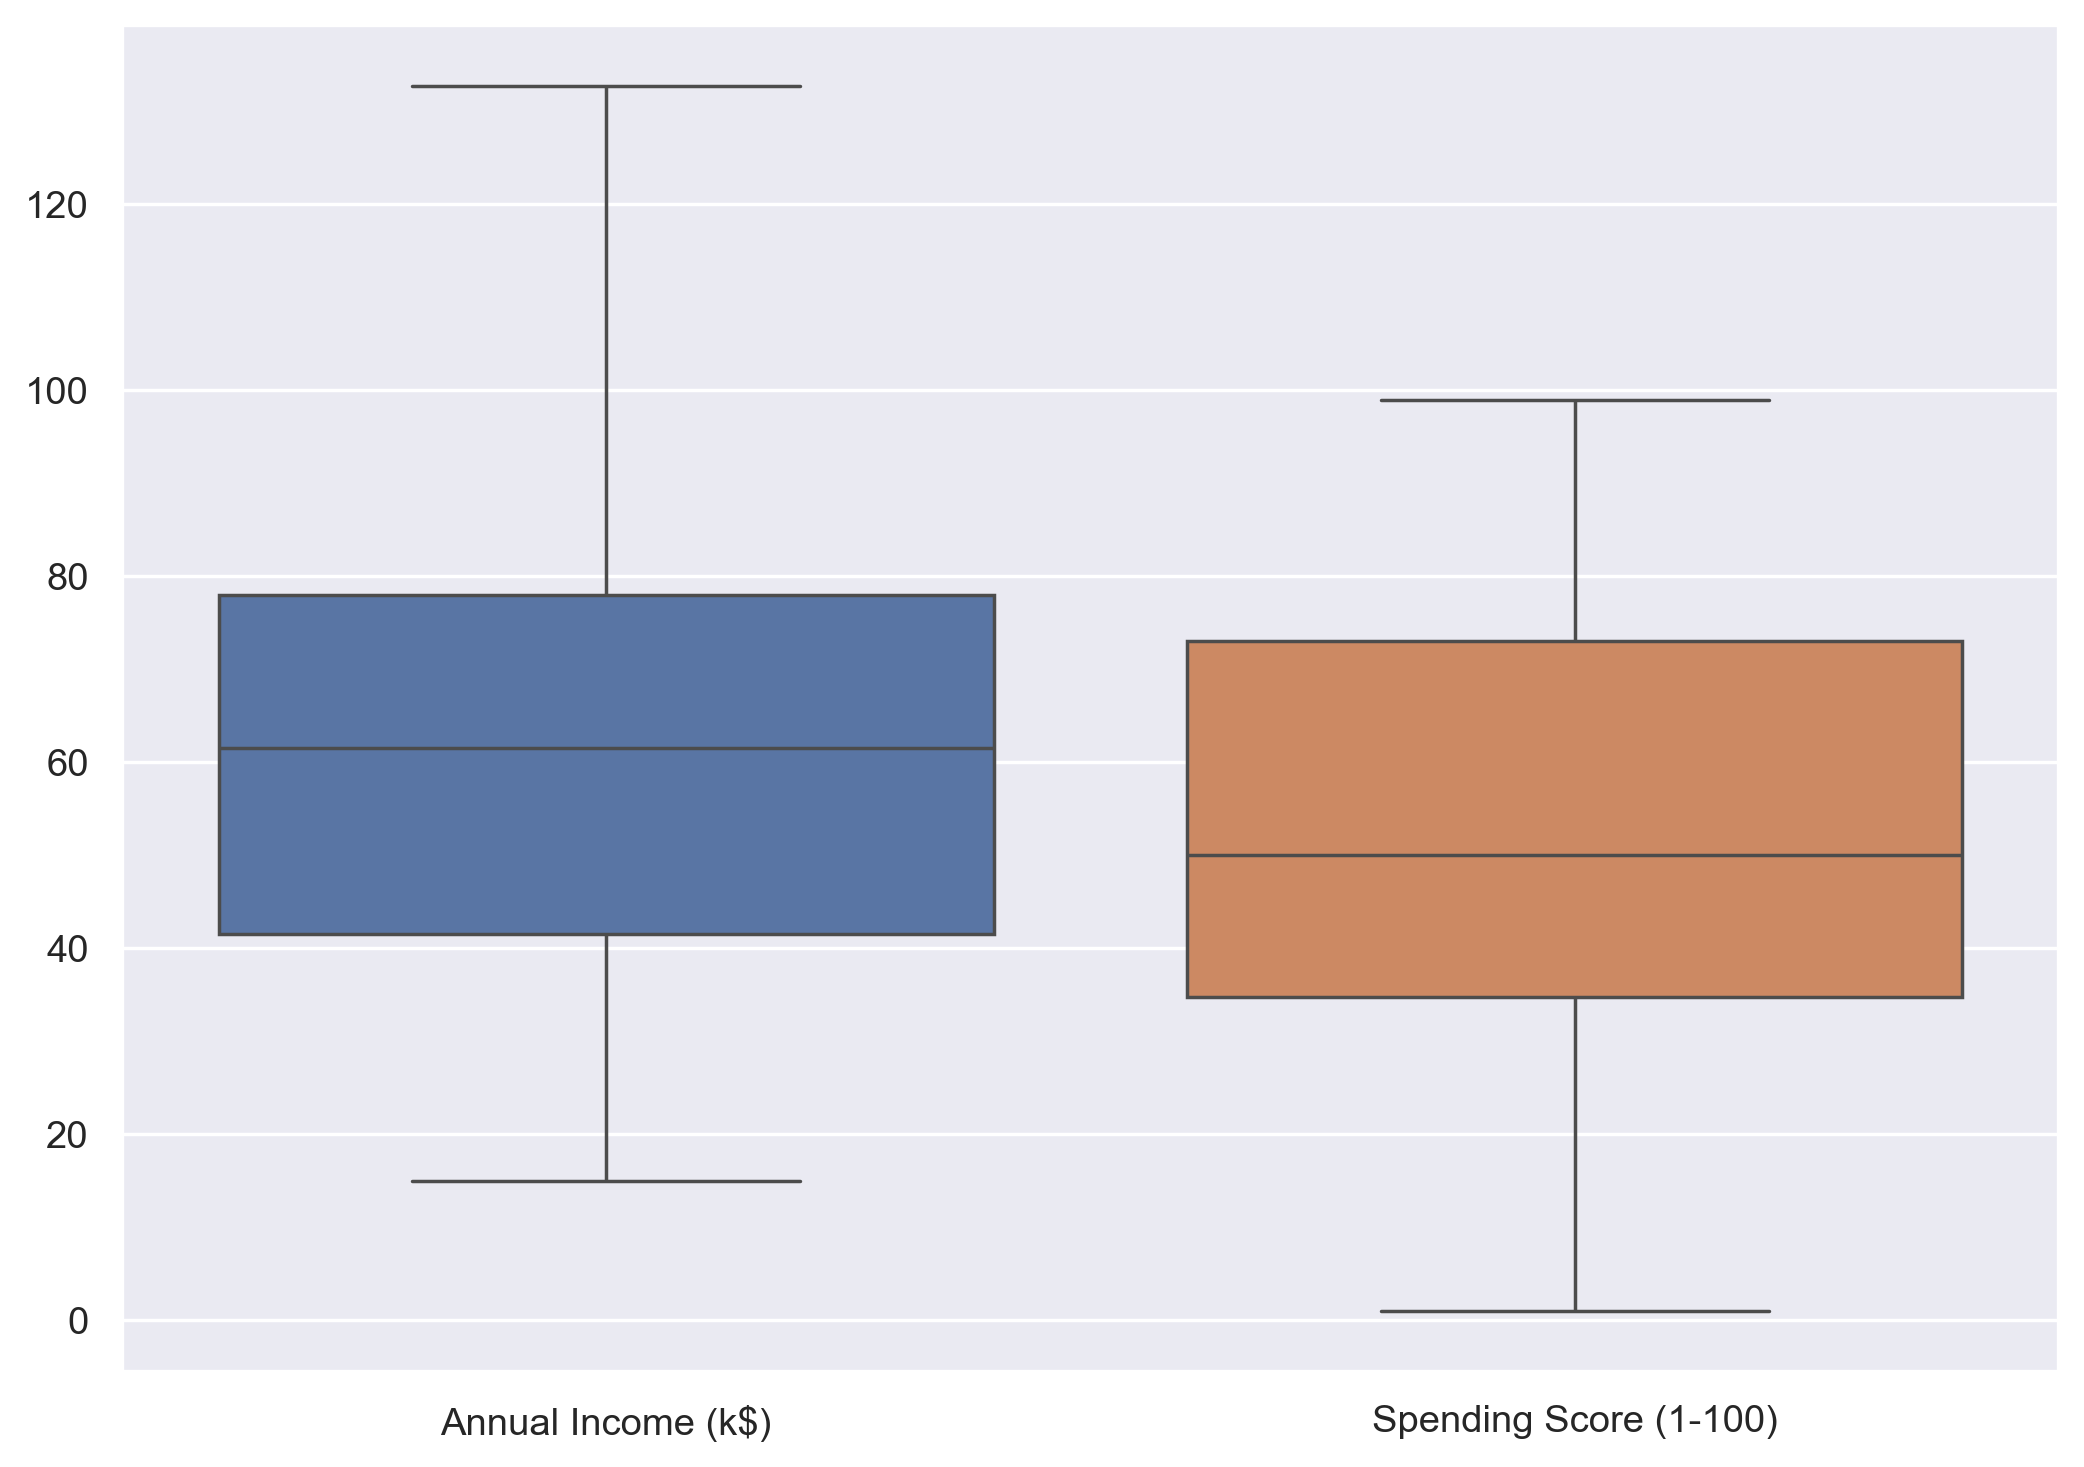

In [16]:
sns.boxplot(df)

In [17]:
# no outlier is present

In [18]:
df.head(2)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15.0,39
2,15.0,81


# DATA TRANSFORMATIONS

In [19]:
# scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73521666, -0.44041245],
       [-1.73521666,  1.1934205 ],
       [-1.69711635, -1.72413834],
       [-1.69711635,  1.03781736],
       [-1.65901603, -0.40151167],
       [-1.65901603,  0.99891658],
       [-1.62091572, -1.72413834],
       [-1.62091572,  1.6991307 ],
       [-1.5828154 , -1.8408407 ],
       [-1.5828154 ,  0.84331344],
       [-1.5828154 , -1.41293207],
       [-1.5828154 ,  1.89363462],
       [-1.54471509, -1.37403128],
       [-1.54471509,  1.03781736],
       [-1.54471509, -1.45183285],
       [-1.54471509,  1.11561893],
       [-1.50661477, -0.59601559],
       [-1.50661477,  0.60990873],
       [-1.43041414, -0.8294203 ],
       [-1.43041414,  1.85473384],
       [-1.39231382, -0.59601559],
       [-1.39231382,  0.88221422],
       [-1.35421351, -1.76303913],
       [-1.35421351,  0.88221422],
       [-1.23991256, -1.41293207],
       [-1.23991256,  1.23232128],
       [-1.23991256, -0.71271795],
       [-1.23991256,  0.41540481],
       [-1.20181225,

In [20]:
pd.DataFrame(x, columns=df.columns)          #for my own understanding

,Annual Income (k$),Spending Score (1-100)
0,-1.735217,-0.440412
1,-1.735217,1.193420
2,-1.697116,-1.724138
3,-1.697116,1.037817
4,-1.659016,-0.401512
...,...,...
191,2.265316,1.115619
192,2.493918,-0.868321
193,2.493918,0.921115
194,2.751095,-1.257329


# Findin out number of clusters with the help of elbow_graph

In [21]:
wcss = []
for i in range(2, 20):
    model_a = KMeans(n_clusters=i)
    model_a.fit_predict(x)
    wcss.append(model_a.inertia_)

In [22]:
# variance within the clusters values
wcss

[272.6556809203737,
 155.28308435686733,
 106.50552588363364,
 62.7169958826605,
 60.0296742489328,
 43.13811349749107,
 35.927935275233196,
 37.23243541161128,
 28.672152132221456,
 25.571199004737515,
 26.23937327632614,
 21.961685185027868,
 20.452059136016388,
 20.43766589865963,
 16.571089076045457,
 15.349984718058057,
 13.959045971578632,
 13.115972934239716]

In [23]:
# average of euclidean distaces 
len(wcss)

18

Text(0.5, 1.0, 'elbow graph')

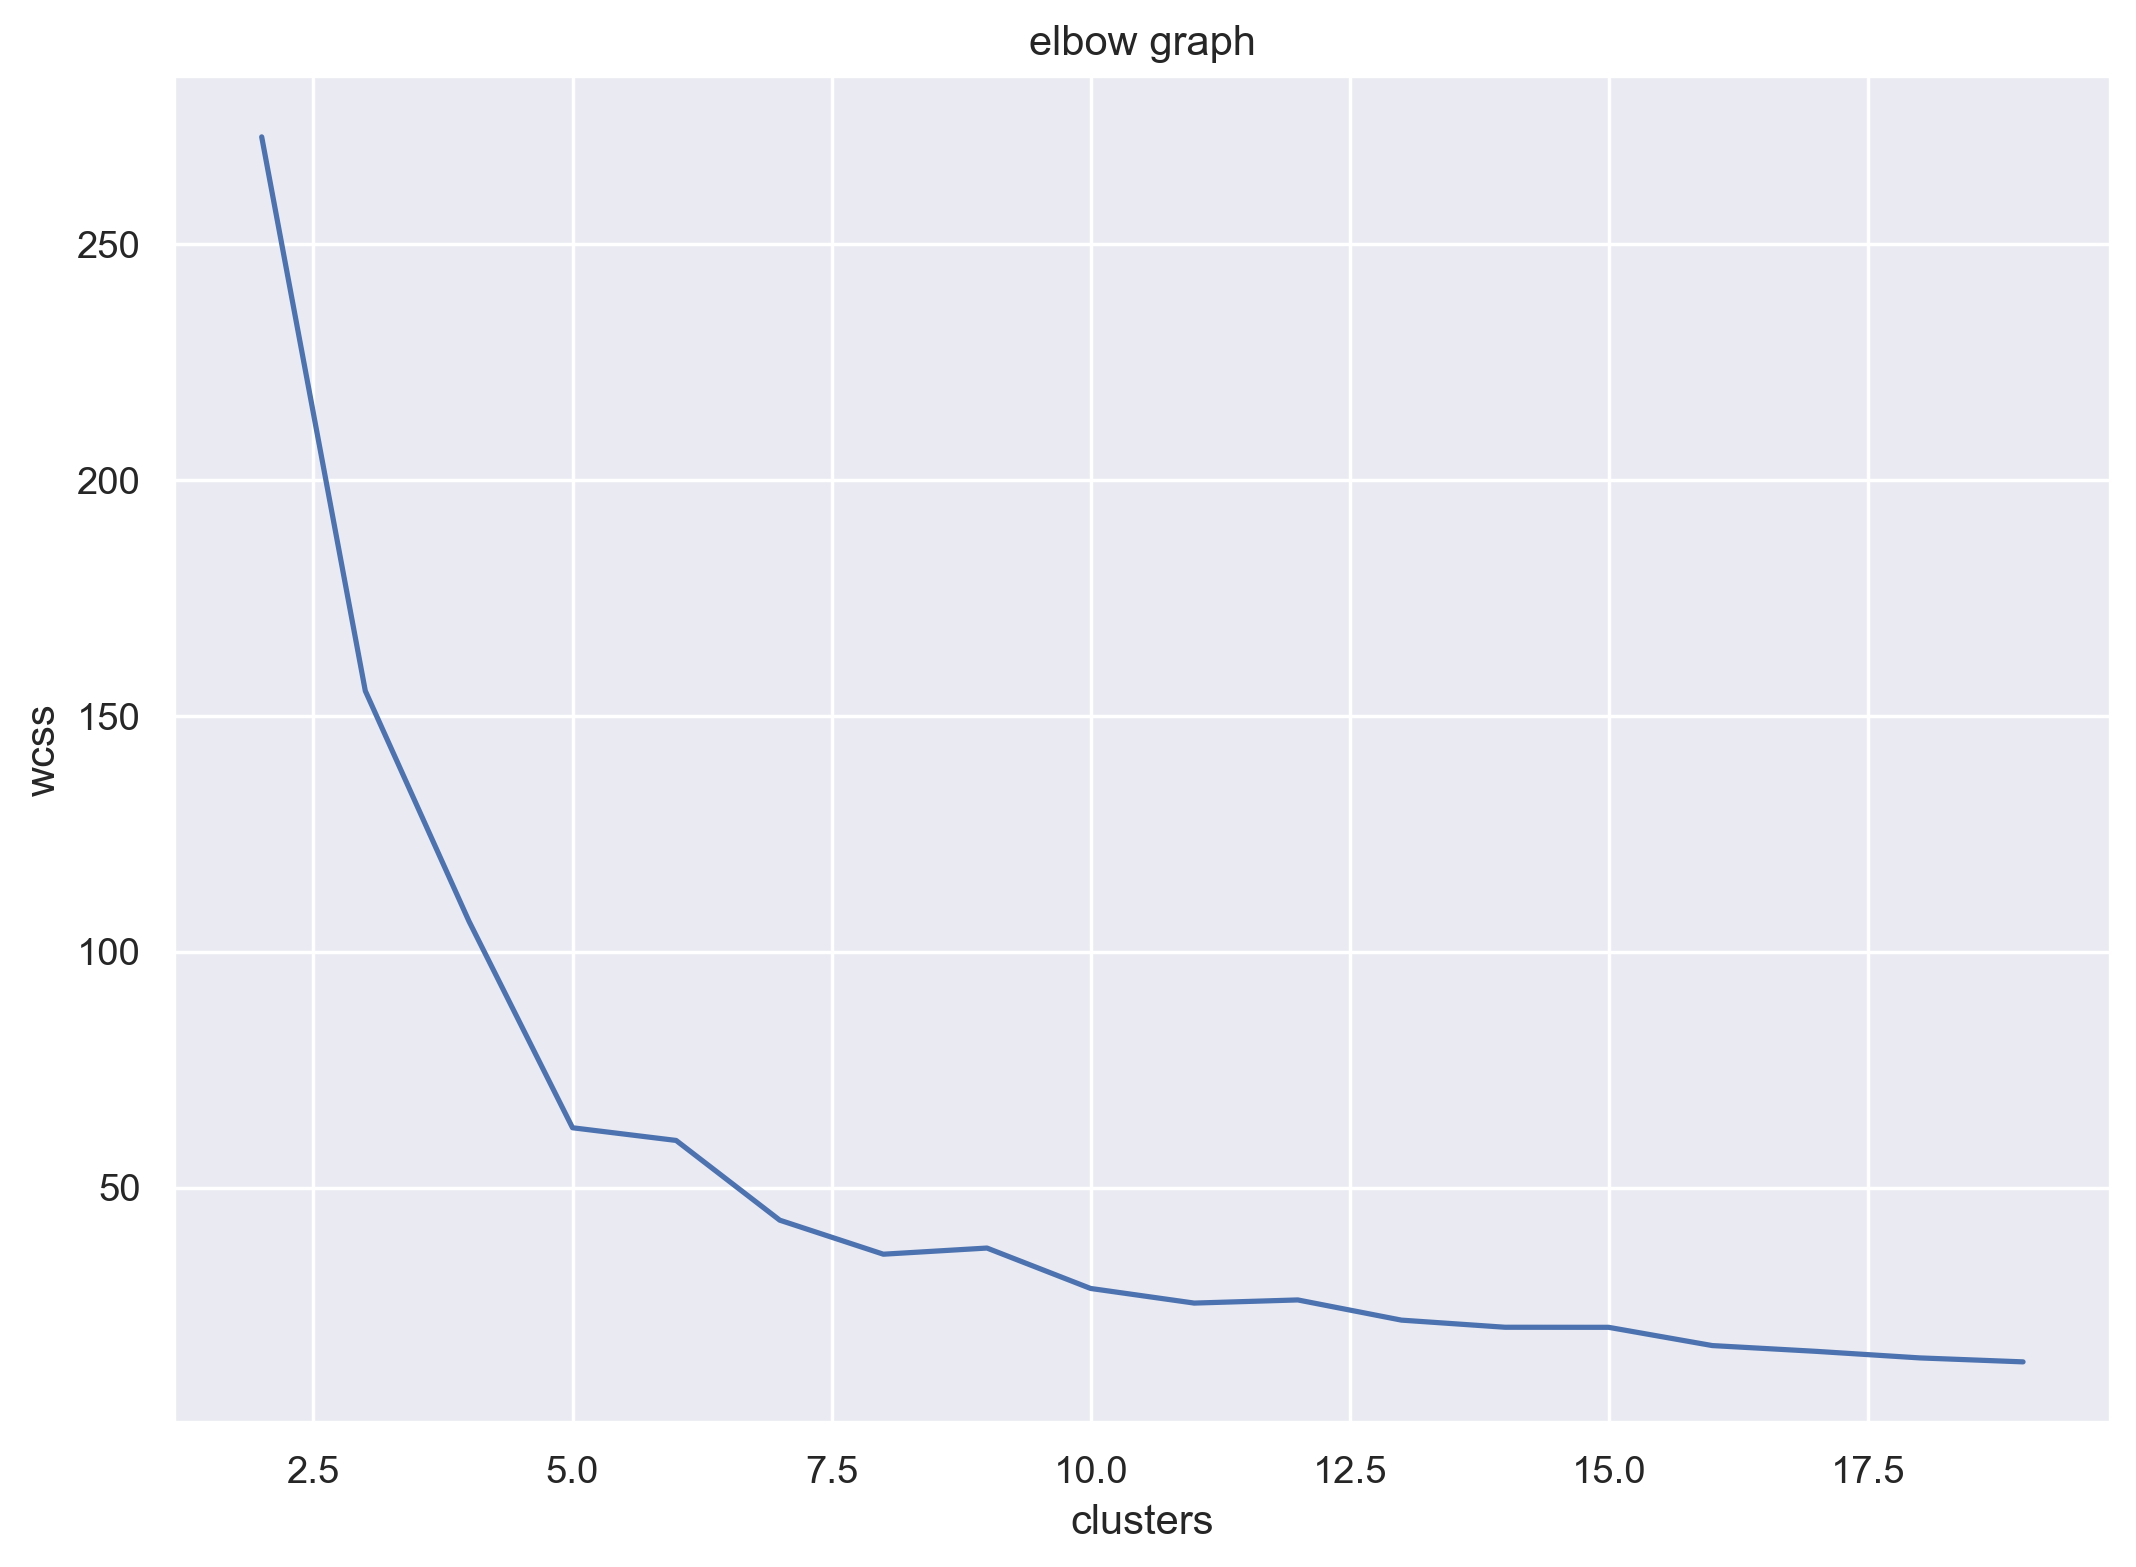

In [24]:
plt.plot(range(2, 20), wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.title('elbow graph')

In [25]:
# ideal clusters can be 5 or 7
# let's check which is giving the best accuracy

# Test models

for 5 clusters
### first model

In [26]:
model1 = KMeans(n_clusters=5)
ypred1 = model1.fit_predict(x)
ypred1

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 1, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3])

In [27]:
# checking accuracy
silhouette_score(x, ypred1)

0.5583537107702079

# second model

In [28]:
model2 = KMeans(n_clusters=7)
ypred2 = model2.fit_predict(x)
ypred2

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3,
       5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4])

In [29]:
# checking accuracy
silhouette_score(x, ypred2)

0.527277047007502

first model is giving more accuracy where number of clusters are 5

# Final_model

In [30]:
MODEL = KMeans(n_clusters=5)
ypred = MODEL.fit_predict(x)
ypred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3,
       4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [31]:
#checking accuracy again just to see
accuracy = silhouette_score(x, ypred)
accuracy

0.5575676425901427

# although the accuracy of the model is not good but I don't have any option because the dataset is small.

In [32]:
df['clusters'] = ypred
df

,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,
1,15.00,39,4
2,15.00,81,2
3,16.00,6,4
4,16.00,77,2
5,17.00,40,4
...,...,...,...
196,120.00,79,1
197,126.00,28,0
198,126.00,74,1


# VISUALIZE THE MODEL

In [33]:
df.head(1)

,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,
1,15.0,39,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

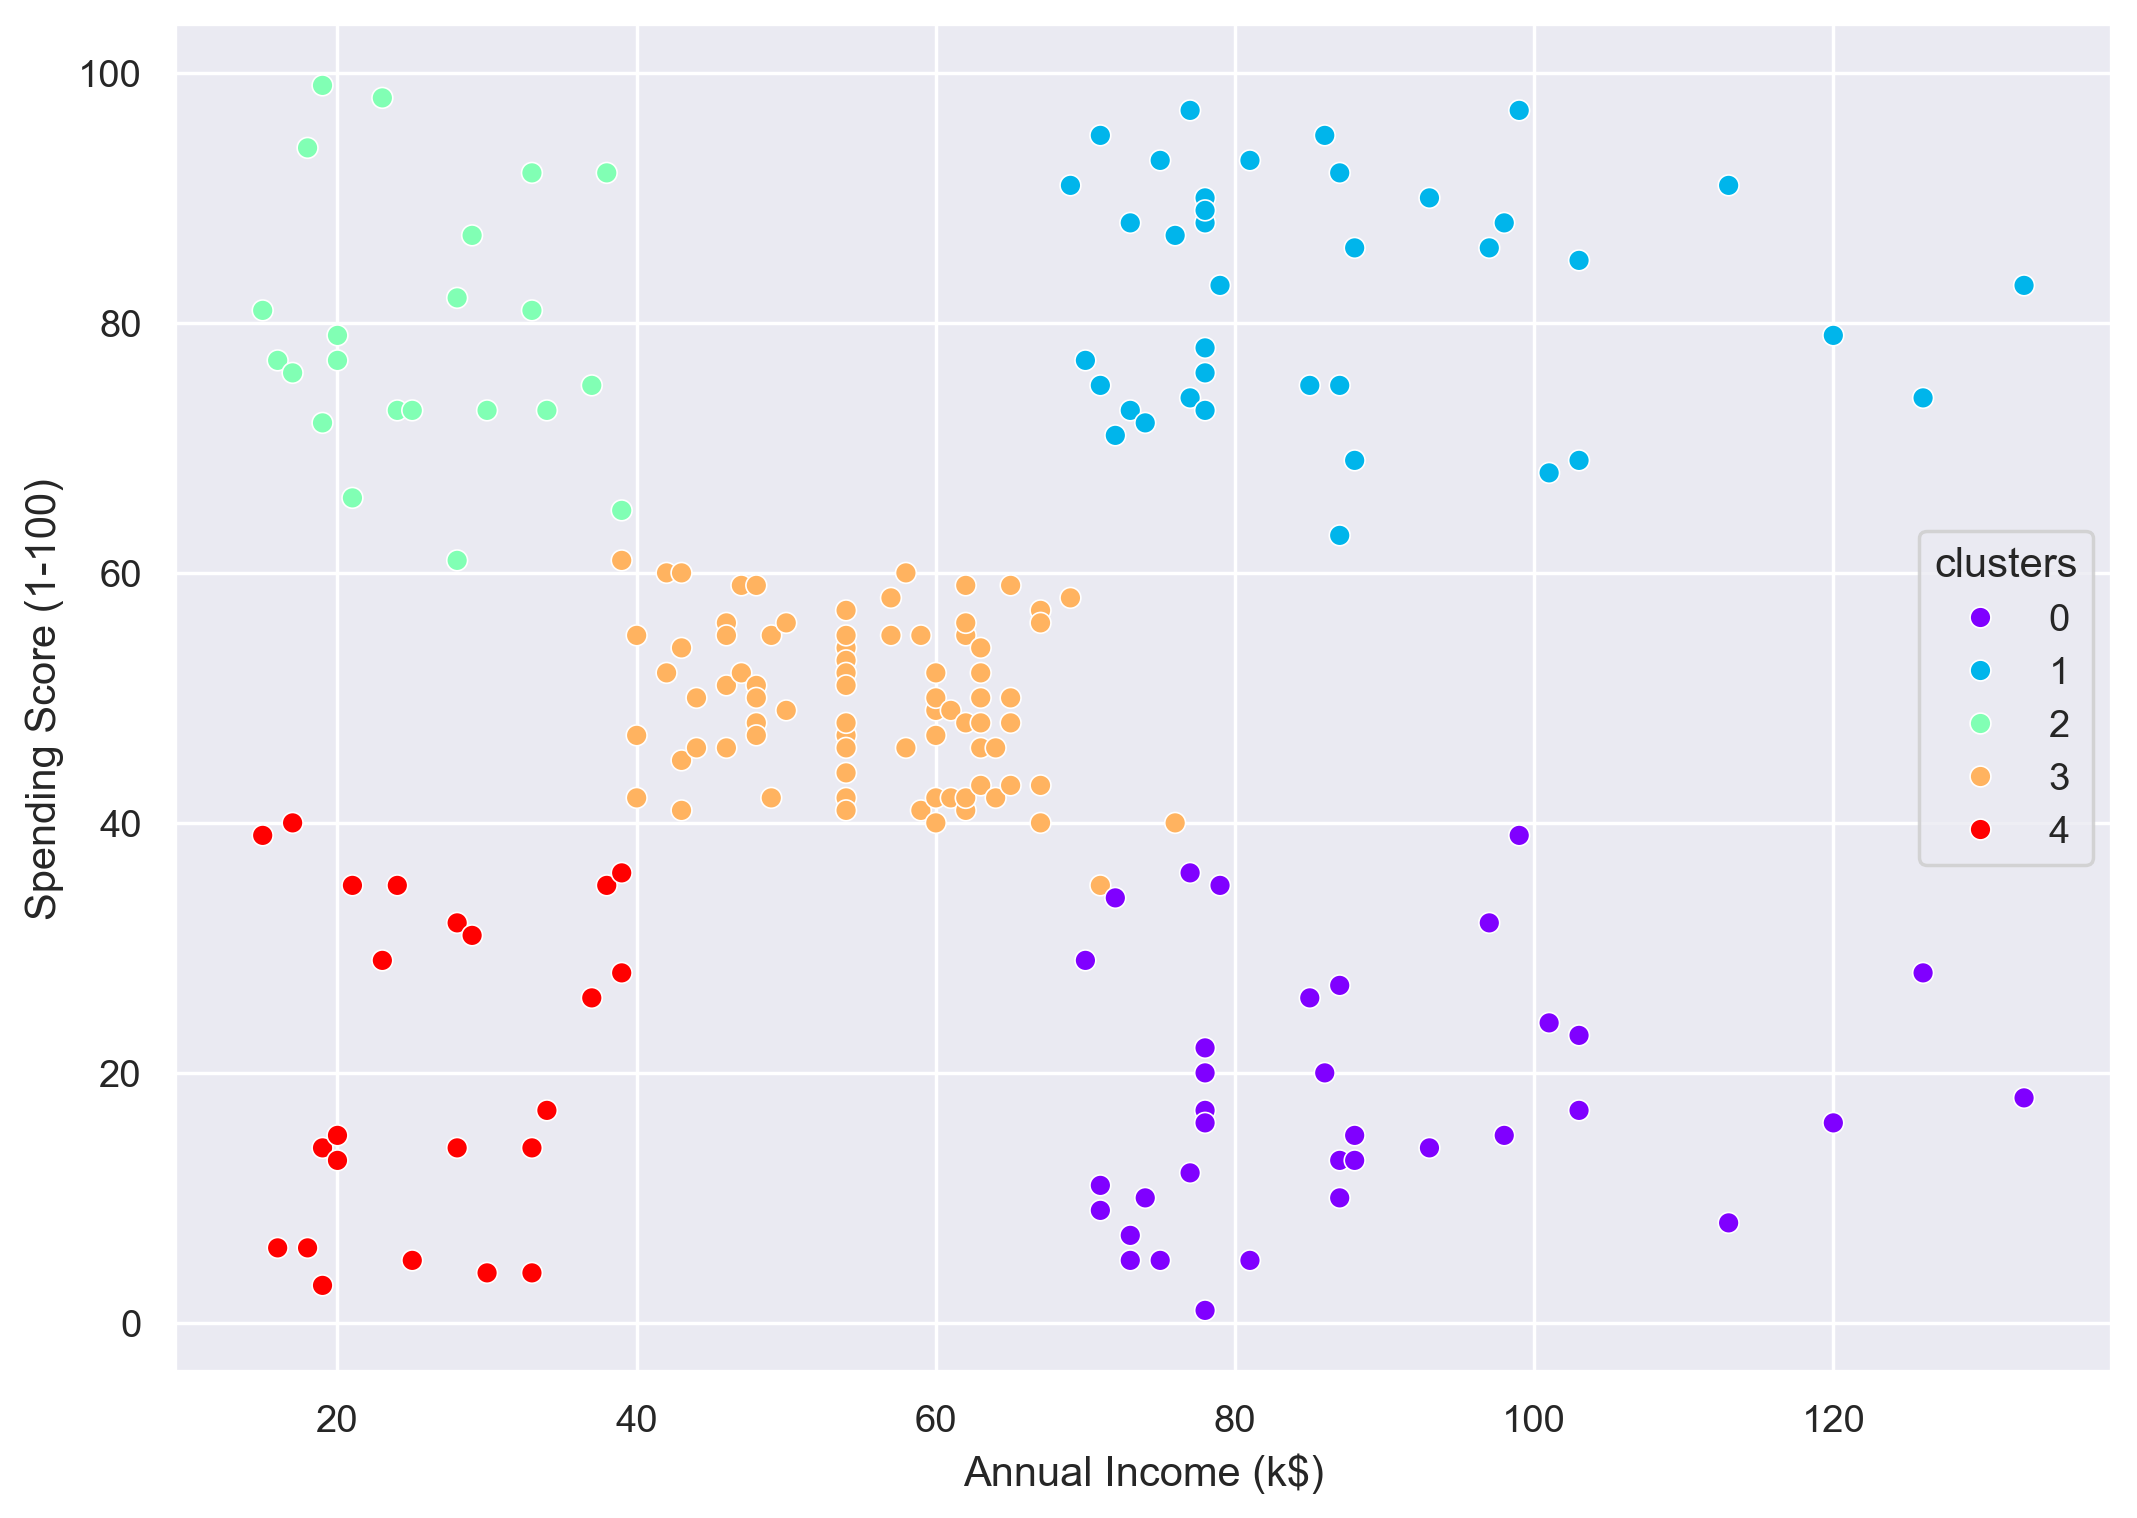

In [34]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['clusters'], palette='rainbow' )

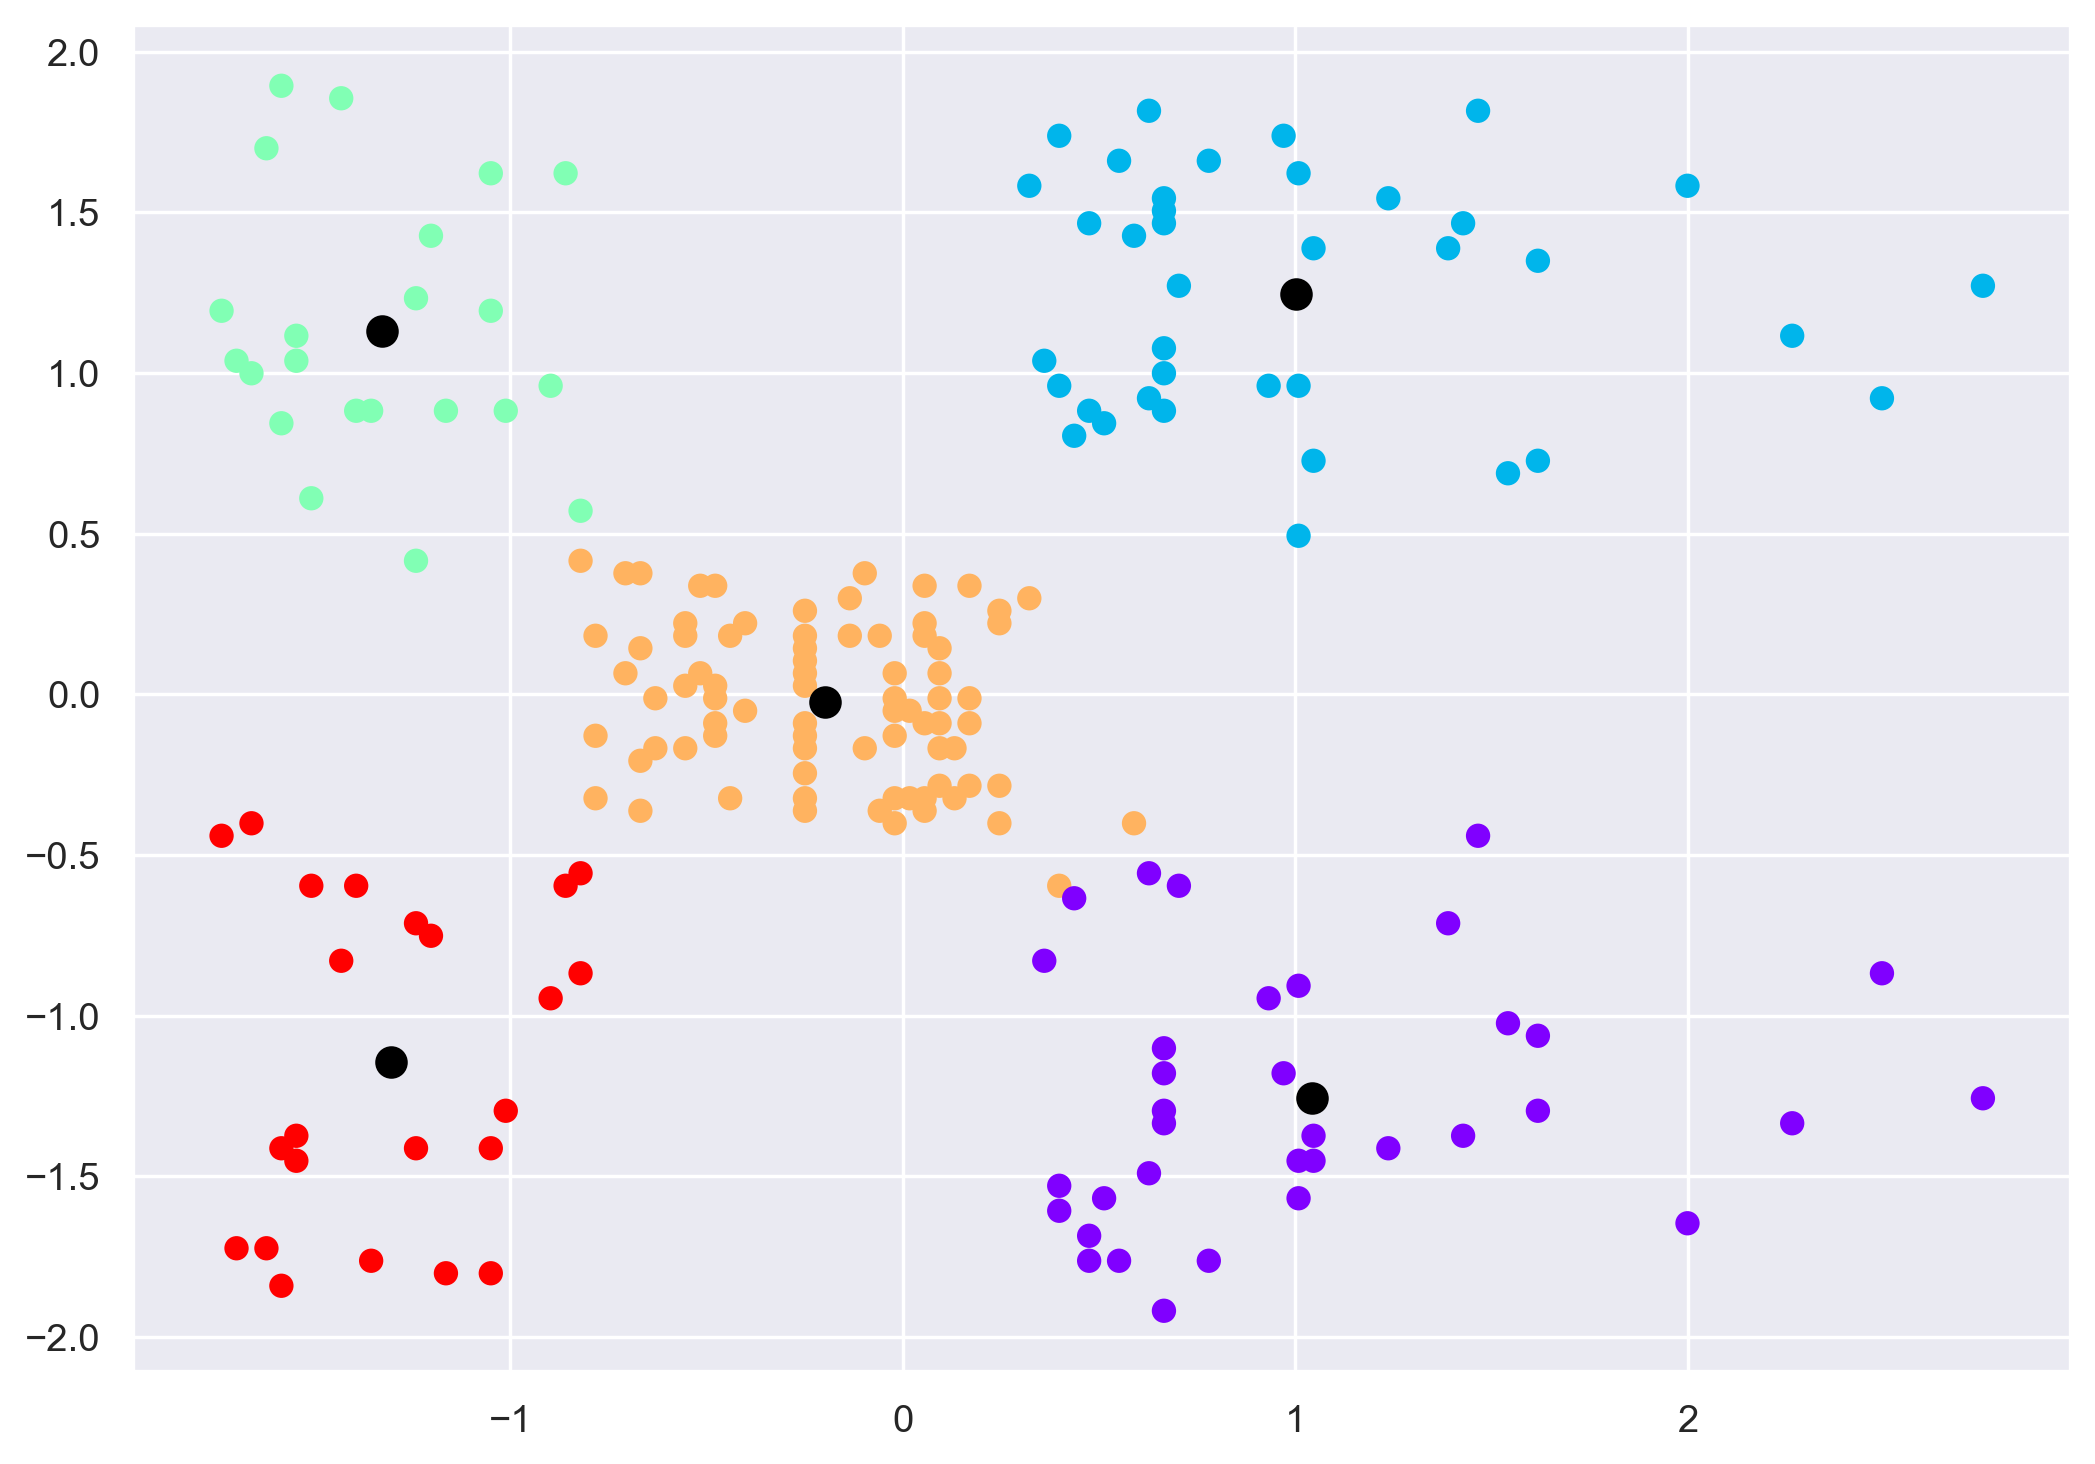

In [35]:
plt.scatter(x[:, 0], x[:, 1], c=ypred, cmap='rainbow')
plt.scatter(MODEL.cluster_centers_[:,0],
            MODEL.cluster_centers_[:,1],
            c='black', s=70
           )

# Anlyse the culusters

In [36]:
analyze = df.groupby('clusters').agg('mean')
analyze

,Annual Income (k$),Spending Score (1-100)
clusters,,
0,87.907143,18.057143
1,86.835526,82.315789
2,25.727273,79.363636
3,55.371795,49.692308
4,26.304348,20.913043


In [37]:
analyze = analyze.sort_values(by='Annual Income (k$)', ascending=False)
analyze

,Annual Income (k$),Spending Score (1-100)
clusters,,
0,87.907143,18.057143
1,86.835526,82.315789
3,55.371795,49.692308
4,26.304348,20.913043
2,25.727273,79.363636


In [38]:
analyze['analysis'] = ['hight income   , low spending group of people',
                       'high income    , high spending group of people',
                       'moderate income, moderate spending group of people',
                       'low income     , low spending group of people',
                       'low income      , high spending group of people'
                       
                      ]
analyze

,Annual Income (k$),Spending Score (1-100),analysis
clusters,,,
0,87.907143,18.057143,"hight income , low spending group of people"
1,86.835526,82.315789,"high income , high spending group of people"
3,55.371795,49.692308,"moderate income, moderate spending group of pe..."
4,26.304348,20.913043,"low income , low spending group of people"
2,25.727273,79.363636,"low income , high spending group of people"
